Mounted at /content/drive
Using device: cuda


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 172MB/s]


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


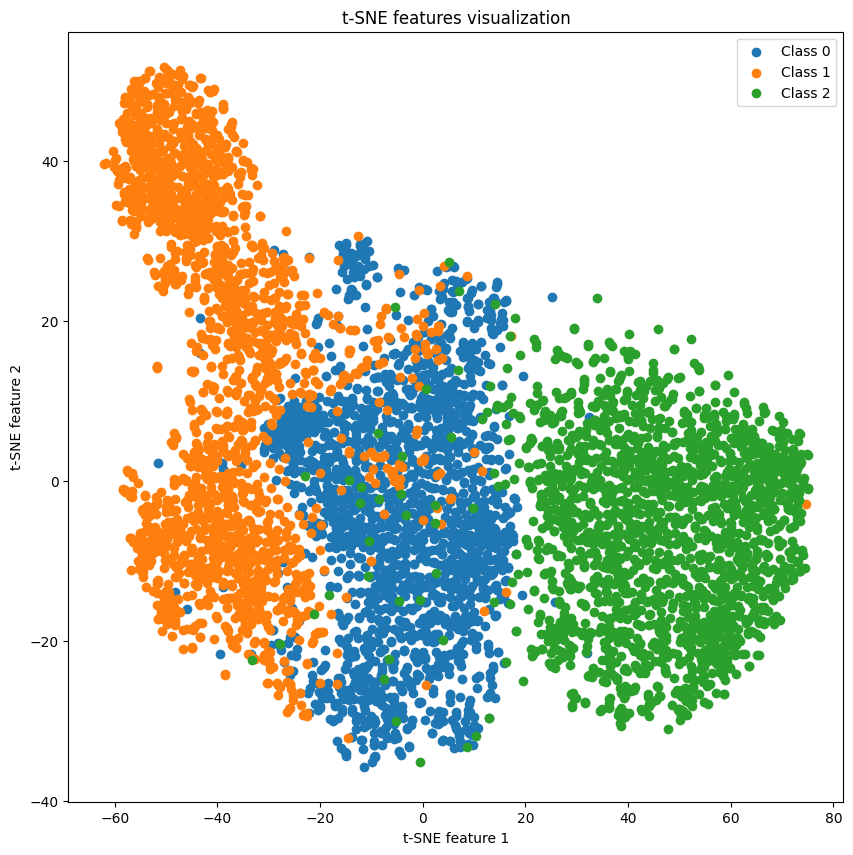

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load the pre-trained ResNet18 model
model = models.resnet18(pretrained=True).to(device)

# Remove the classification layer
model.fc = torch.nn.Identity()

# Set the model to evaluation mode
model.eval()

# Define the image transformations
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Replace with the path to your dataset on Google Drive
dataset_path = '/content/drive/My Drive/Dataset 2/Prostate Cancer'

# Create the dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=preprocess)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=128, shuffle=False)

# Function to extract features
def extract_features(dataloader, model):
    count=1
    features = []
    labels = []
    with torch.no_grad():
        for batch, label in dataloader:

            batch_features = model(batch.to(device))
            print(count)
            batch_features = batch_features.reshape(batch_features.size(0), -1)
            features.append(batch_features.cpu().numpy())
            labels.append(label.cpu().numpy())

    return np.concatenate(features), np.concatenate(labels)

# Extract features and labels
features, labels = extract_features(dataloader, model)

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(features)

# Plot the result of t-SNE
def plot_tsne(features_2d, labels):
    plt.figure(figsize=(10, 10))
    for class_id in np.unique(labels):
        indices = labels == class_id
        plt.scatter(features_2d[indices, 0], features_2d[indices, 1], label=f'Class {class_id}')
    plt.legend()
    plt.title('t-SNE features visualization')
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.show()

# Visualize the features in 2D
plot_tsne(features_2d, labels)
